<a href="https://colab.research.google.com/github/Sonu-ABC/calculator/blob/master/Polynomial_regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from itertools import combinations_with_replacement
from collections import Counter

In [ ]:
#function for scaling the data
class StandardScalerFromScratch:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [ ]:
#custom train_test_split
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle the data
    indices = np.random.permutation(X.shape[0])
    test_set_size = int(X.shape[0] * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
#custom mean squared error
def mean_squared_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    squared_diff = (y_true - y_pred) ** 2
    mse = np.mean(squared_diff)
    rmse = np.sqrt(mse)
    return mse,rmse


In [ ]:
#class for linear regression
class Custom_Linear_Regression:
  def __init__(self, learning_rate, epochs):
    self.learning_rate = learning_rate
    self.epochs = epochs
  def initialise_parameters(self,lenw):
    w = np.random.rand(1,lenw)
    b = 0
    return w,b
  def predict(self,X,w,b):
    z = np.dot(w,X) + b
    return z
  def cost_function(self,z,y):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y))
    return J
  def back_prop(self,X,y,z):
    m = y.shape[1]
    dw = (1/m)*np.dot(z-y,X.T)
    db = (1/m)*np.sum(z-y)
    return dw,db
  def gradient_descent_update(self,w,b,dw,db,learning_rate):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b
  def fit(self,X_train,y_train):
    lenw = X_train.shape[0]
    w,b = self.initialise_parameters(lenw)

    costs_train = []
    n_train=y_train.shape[1]
    for i in range(1,self.epochs+1):
      z_train = self.predict(X_train,w,b)
      cost_train = self.cost_function(z_train,y_train)
      dw,db = self.back_prop(X_train,y_train,z_train)
      w,b = self.gradient_descent_update(w,b,dw,db,self.learning_rate)
      if i%900==0:
        print("Cost Function Value : ",cost_train)

      costs_train.append(cost_train)
    plt.plot(costs_train)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs Epochs')
    plt.show()
    return [w,b]

In [ ]:
#polynomialdegree_function

from itertools import combinations_with_replacement

def polynomial_features(X, degree):

    n_samples, n_features = X.shape
    features = [np.ones(n_samples)]
    for d in range(1, degree + 1):
        for combo in combinations_with_replacement(range(n_features), d):
            features.append(np.prod(X[:, combo], axis=1))

    return pd.DataFrame(np.vstack(features).T, columns=[f'Feature_{i+1}' for i in range(np.vstack(features).T.shape[1])])


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        1.0        2.0        1.0        0.0        4.0        2.0   
1        1.0        3.0        1.0        0.0        9.0        3.0   

   Feature_7  Feature_8  Feature_9  Feature_10  
0        0.0        1.0        0.0         0.0  
1        0.0        1.0        0.0         0.0  


In [ ]:
# Loading training data
train_df = pd.read_csv('/content/polynomial_regression_train.csv')

# Loading test data
test_df = pd.read_csv('/content/polynomial_regression_test.csv')
train_df=train_df.dropna()
test_df=test_df.dropna()

In [ ]:
train_df = train_df.drop('ID', axis=1)
test_df = test_df.drop('ID', axis=1)
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']
X_test = test_df
train_df = train_df.dropna()

test_df = test_df.dropna()

In [ ]:
#scaling the data
scaler=StandardScalerFromScratch()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0      -0.271461   0.850624  -1.080851   0.363530  -0.301202
1      -0.336494  -1.021578   0.531301   0.046764   0.600735
2      -1.085807  -0.119574  -0.003586   0.421657  -0.206249
3      -0.384563  -1.493370  -0.087117   0.775626   0.280891
4      -1.506196   1.687334   1.103580  -0.411583   0.915993
...          ...        ...        ...        ...        ...
47995   0.960931   0.200218  -1.553093  -0.495228  -1.644733
47996   1.486916  -0.624647   0.828409   0.274235   0.098704
47997  -1.463971   1.524793   0.882218   0.299410   1.144433
47998   1.123585   0.274275  -0.054693   0.608301  -0.532267
47999  -0.877687  -1.435487  -0.706361   0.881442  -1.068937

[48000 rows x 5 columns]
       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0       1.473675  -0.173938   0.684146  -0.356010   1.460650
1       0.664235   0.778660  -0.053509  -1.494428  -1.178729
2       0.522903   0.345611  -0.440949  -0.473934  -1.40925

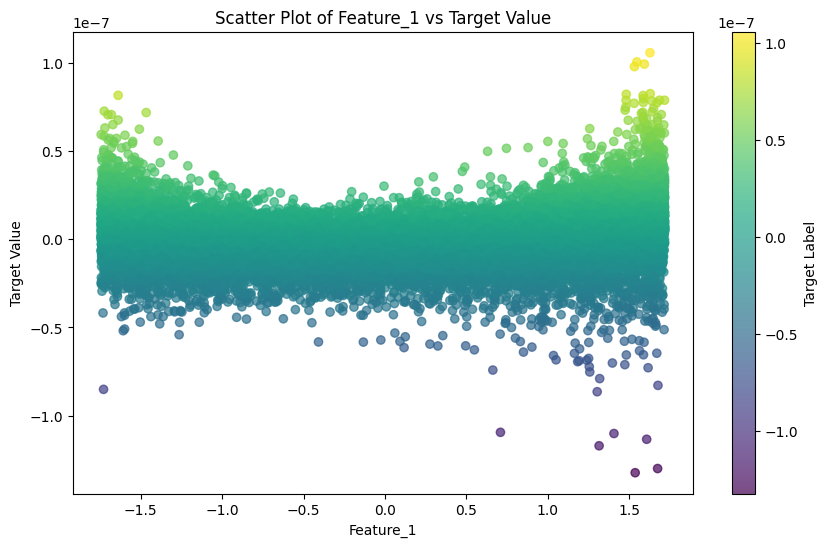

In [ ]:
feature = X_train['Feature_1']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(feature, y_train, c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Feature_1')#plotting the ddatapoints based on any one feature
plt.ylabel('Target Value')
plt.title('Scatter Plot of Feature_1 vs Target Value')
plt.colorbar(scatter, label='Target Label')
plt.show()

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train.values, y_train.values, test_size=0.2, random_state=42)
print(X_train_split.shape)
print(X_val.shape)
print(y_train_split.shape)
print(y_val.shape)

(38400, 5)
(9600, 5)
(38400,)
(9600,)


In [ ]:
#function for r2 score calculation
def r2_score(y_true, y_pred):
  tss = np.sum((y_true - np.mean(y_true))**2)
  rss = np.sum((y_true - y_pred)**2)
  print('tss : ',tss)
  print('rss : ',rss)
  r2 = 1 - (rss / tss)
  return r2

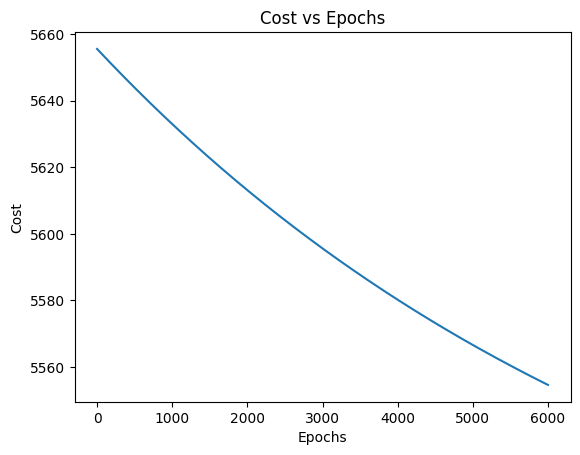

[[ 2.71682474e-11  7.38863560e-10 -7.37047574e-10 ... -2.79412933e-10
  -1.41839362e-10 -1.12966880e-09]]
tss :  1.1236703464548135e-12
rss :  1.0992900023810742e-12
Degree 1: R2 = 0.021697061020306774


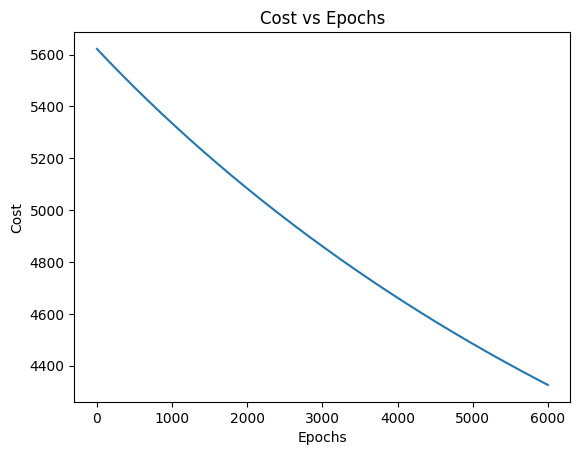

[[-1.67651618e-09 -8.32739688e-10 -2.32140113e-09 ... -1.47354907e-09
  -8.42896301e-10  1.07938999e-09]]
tss :  1.1236703464548135e-12
rss :  8.696642003655469e-13
Degree 2: R2 = 0.22605041317558794


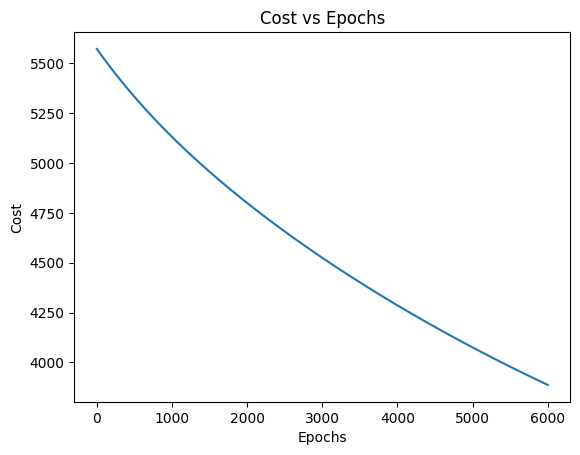

[[-1.22278892e-09  4.87124963e-10 -2.84943825e-09 ... -9.24594428e-10
  -1.22188837e-09  2.30610588e-10]]
tss :  1.1236703464548135e-12
rss :  7.755655377985767e-13
Degree 3: R2 = 0.3097926449287458


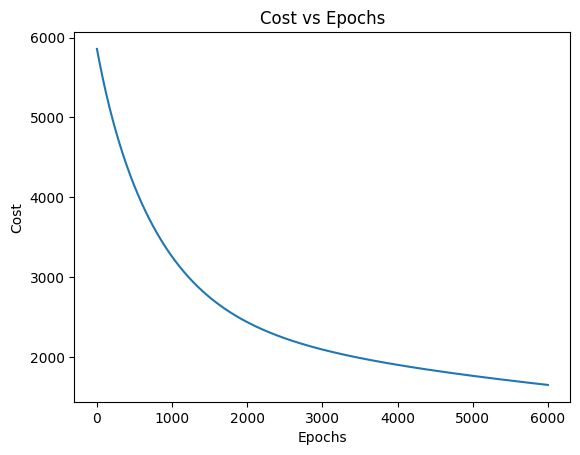

[[-4.79612449e-09 -3.98067985e-09 -6.36728013e-09 ... -3.83626840e-09
  -2.43922866e-09  5.91282528e-09]]
tss :  1.1236703464548135e-12
rss :  3.405563035428037e-13
Degree 4: R2 = 0.6969250771658602


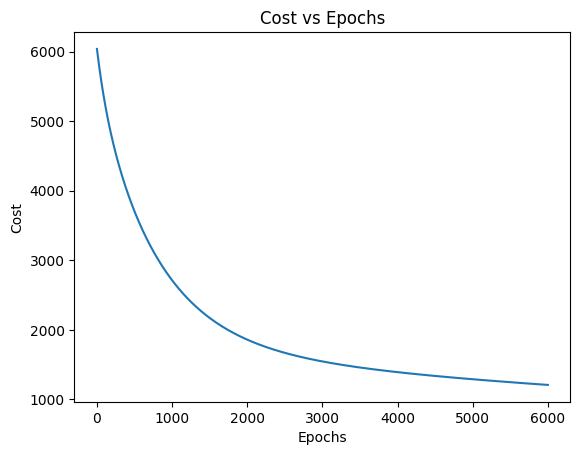

[[-5.14552506e-09 -5.22243480e-09 -6.13591376e-09 ... -3.03502914e-09
  -2.14647889e-09  7.08053910e-09]]
tss :  1.1236703464548135e-12
rss :  2.471008644351587e-13
Degree 5: R2 = 0.7800948781688835


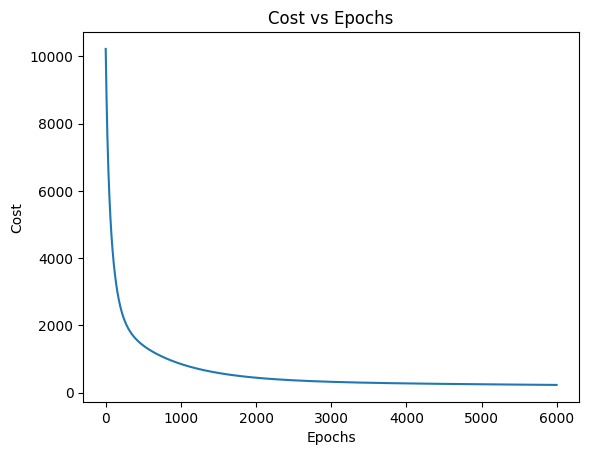

[[-7.40832687e-09 -5.53100322e-09 -4.95868489e-09 ... -4.32706095e-09
  -1.93404562e-09  8.03625808e-09]]
tss :  1.1236703464548135e-12
rss :  4.4834113392870737e-14
Degree 6: R2 = 0.960100296733537


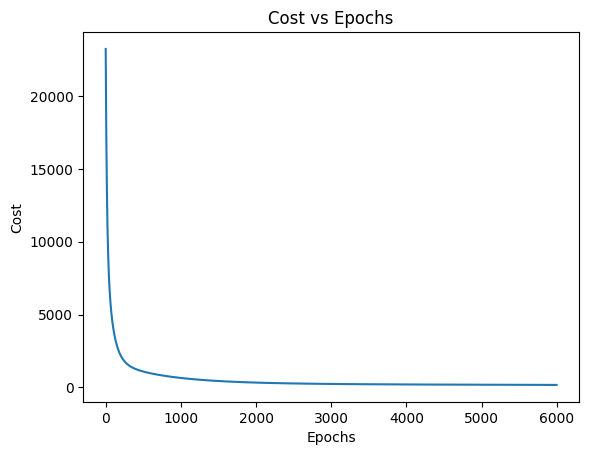

[[-7.42048754e-09 -4.79466582e-09 -4.87071983e-09 ... -4.42295917e-09
  -1.72776573e-09  7.90147905e-09]]
tss :  1.1236703464548135e-12
rss :  3.4910483266370176e-14
Degree 7: R2 = 0.9689317392983512


In [ ]:
#finding best degree from a list of degrees
def find_best_degree(X_train, y_train, X_val, y_val,max_deg):
    degrees = range(1,max_deg)
    errors = []
    list_para=[]
    for degree in degrees:
        X_train_poly = polynomial_features(X_train,degree)
        X_val_poly = polynomial_features(X_val,degree)
        X_train_poly=X_train_poly.T
        y_train_df=y_train.T
        X_test_poly=X_val_poly.T
        y_test_df=(y_val.T)
        y_test_df = np.array(y_test_df)
        y_test_df = y_test_df.reshape(-1,1)
        y_train_df = np.array(y_train_df)
        y_train_df = y_train_df.reshape(-1,1)
        y_train_df=y_train_df.T
        y_test_df=y_test_df.T
        scaling_factor = 1e10
        y_train_scaled = y_train_df * scaling_factor

        model = Custom_Linear_Regression(.00006,6000)
        parameters=model.fit(X_train_poly, y_train_scaled)
        y_pred=model.predict(X_test_poly,parameters[0],parameters[1])
        y_pred = y_pred / scaling_factor
        print(y_pred[:10])
        r2 = r2_score(y_test_df, y_pred)
        errors.append((degree, r2))
        list_para.append(parameters)
        print(f'Degree {degree}: R2 = {r2}')

    return errors
r2 = find_best_degree(X_train_split, y_train_split, X_val, y_val,8)

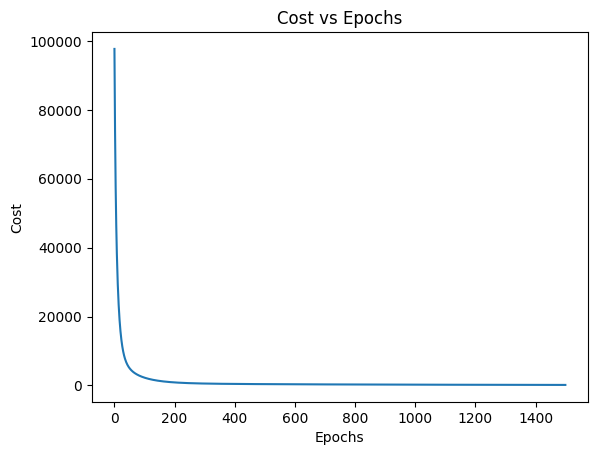

[[-7.03134141e-09 -6.75402482e-09 -4.79870973e-09 ...  2.68815092e-08
  -7.73013239e-09 -1.53660526e-10]]
tss :  5.614161628799281e-13
rss :  1.8466559371160214e-14
Degree 8: R2 = 0.9671071825284985


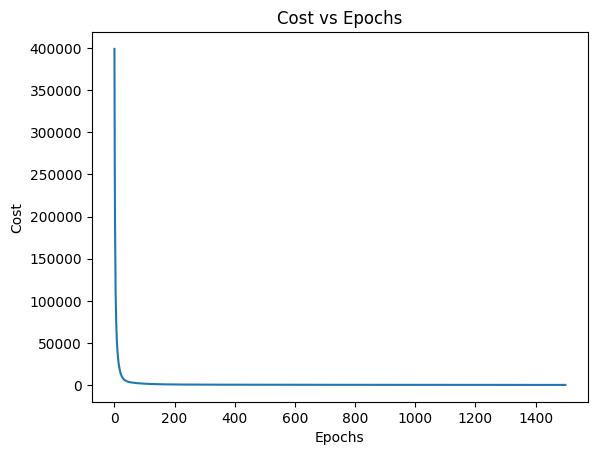

[[-8.36090536e-09 -3.32077388e-09 -5.18159118e-09 ...  2.45441933e-08
  -6.18066652e-09 -2.26965497e-10]]
tss :  5.614161628799281e-13
rss :  2.1074546111241758e-14
Degree 9: R2 = 0.9624618108550091


In [ ]:
def find_best_degree(X_train, y_train, X_val, y_val,max_deg):
    degrees = range(8,max_deg)
    errors = []
    list_para=[]
    for degree in degrees:
        X_train_poly = polynomial_features(X_train,degree)
        X_val_poly = polynomial_features(X_val,degree)
        X_train_poly=X_train_poly.T
        y_train_df=y_train.T
        X_test_poly=X_val_poly.T
        y_test_df=(y_val.T)
        y_test_df = np.array(y_test_df)
        y_test_df = y_test_df.reshape(-1,1)
        y_train_df = np.array(y_train_df)
        y_train_df = y_train_df.reshape(-1,1)
        y_train_df=y_train_df.T
        y_test_df=y_test_df.T
        scaling_factor = 1e10
        y_train_scaled = y_train_df * scaling_factor

        model = Custom_Linear_Regression(.00006,1500)
        parameters=model.fit(X_train_poly, y_train_scaled)
        y_pred=model.predict(X_test_poly,parameters[0],parameters[1])
        y_pred = y_pred / scaling_factor
        print(y_pred[:10])
        r2 = r2_score(y_test_df, y_pred)
        errors.append((degree, r2))
        list_para.append(parameters)
        print(f'Degree {degree}: R2 = {r2}')

    return errors
r2 = find_best_degree(X_train_split, y_train_split, X_val, y_val,10)

(0.9671071825284985, 0.9624618108550091)


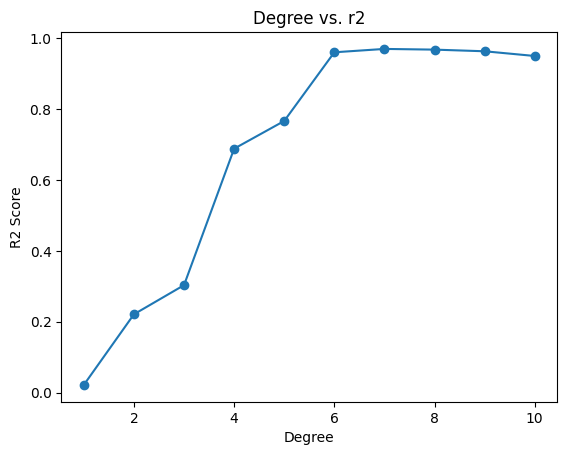

In [ ]:
#plotting r2 score vs  degree
plt.plot([1,2,3,4,5,6,7,8,9,10], [ 0.02202282930973165, 0.22110103055494623, 0.30321645761036187, 0.6878754406647851, 0.7660171072129836, 0.9595900667634972, 0.9690968387523105,0.9671071825284985,0.9624618108550091,0.9491974570180337], marker='o')
plt.xlabel('Degree')
plt.ylabel('R2 Score')
plt.title('Degree vs. r2')
plt.show()

50


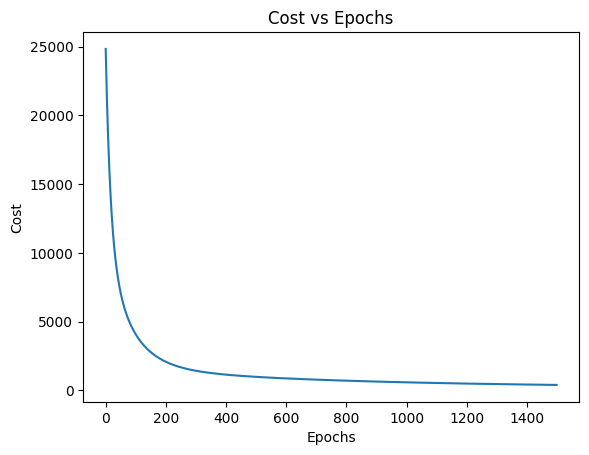

[[-2.45728877e-09  1.97832307e-08  2.83235801e-08 ...  3.37413869e-08
   4.76112572e-09  1.99162249e-10]]
tss :  1.1105779090687945e-12
rss :  8.02867883046001e-14
Iteration no. 1: R2 = 0.927707198523407
73


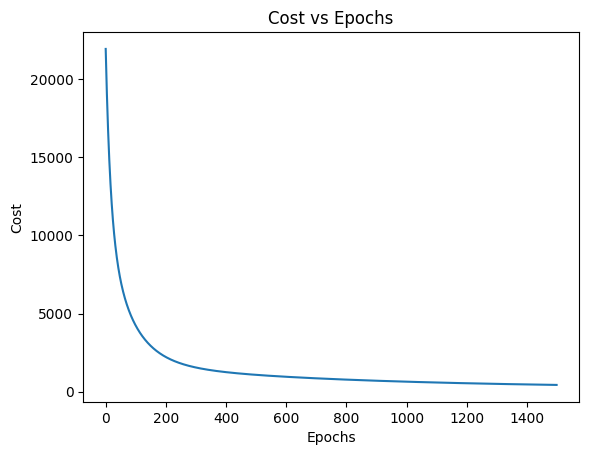

[[ 1.38219567e-09 -1.10029135e-08  1.65399497e-09 ... -1.23978009e-08
   4.99076590e-09 -7.99174038e-09]]
tss :  1.1067052907046438e-12
rss :  8.84390651298062e-14
Iteration no. 2: R2 = 0.9200879711404499
96


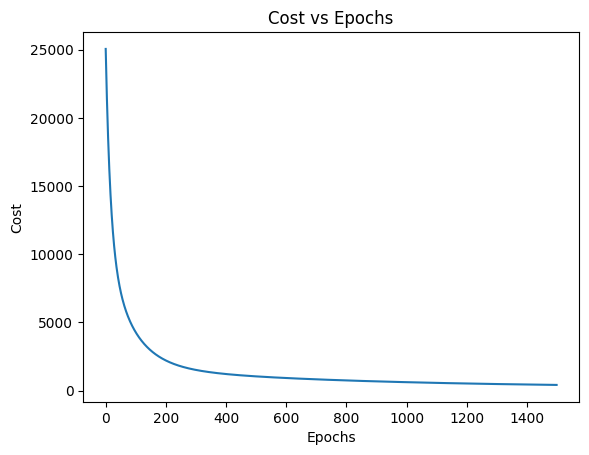

[[-1.35587302e-08 -1.53179465e-09  3.61853233e-10 ... -1.42873359e-08
   5.40902801e-09 -2.23155917e-08]]
tss :  1.1376802592684703e-12
rss :  8.267433982657103e-14
Iteration no. 3: R2 = 0.9273307775598297
99


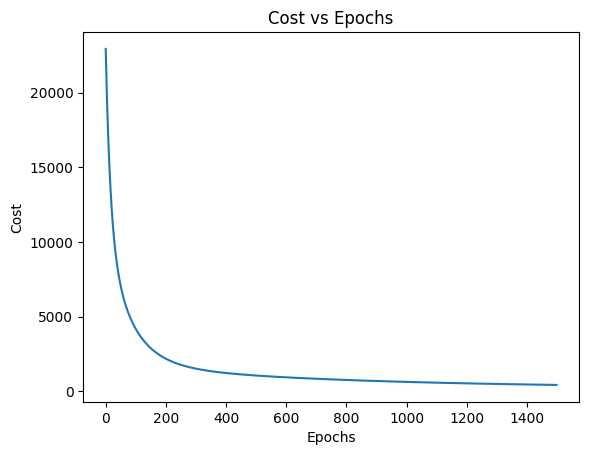

[[ 4.00845512e-09  4.31223844e-09  3.45670211e-09 ...  5.00202576e-09
  -1.14636725e-10 -8.75269808e-09]]
tss :  1.0633373250736488e-12
rss :  8.505365475269052e-14
Iteration no. 4: R2 = 0.9200125371816517
91


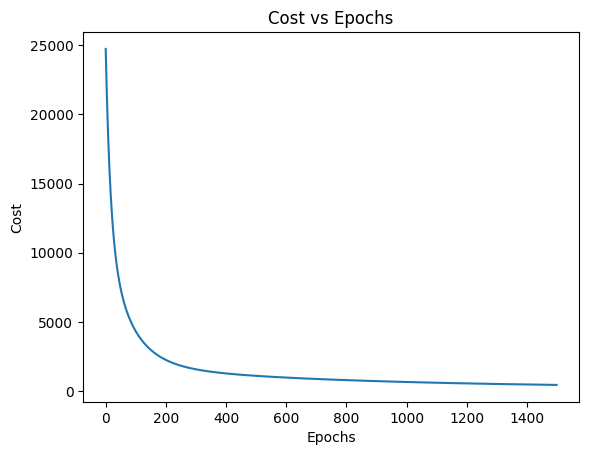

[[-5.26053576e-09  5.18856622e-09 -4.80159571e-10 ...  2.07181129e-09
   5.95328319e-10  6.79977801e-09]]
tss :  1.081933375960904e-12
rss :  8.497799171375845e-14
Iteration no. 5: R2 = 0.9214572786071171
26


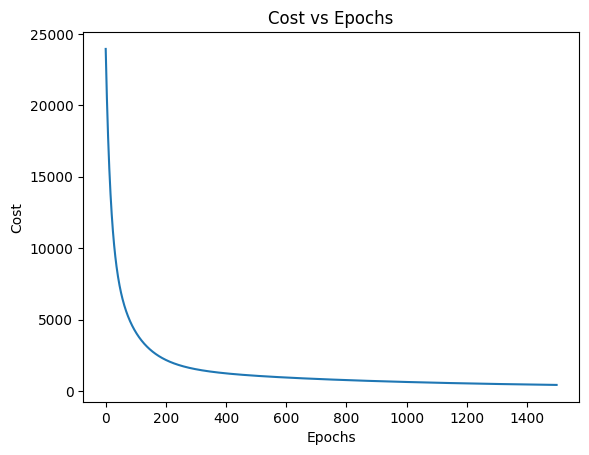

[[ 6.80902482e-10  1.68059348e-09 -6.53620345e-09 ... -5.49975643e-09
  -3.60431895e-09 -1.97856257e-09]]
tss :  1.103856323492065e-12
rss :  8.31345369799981e-14
Iteration no. 6: R2 = 0.9246871760293941
90


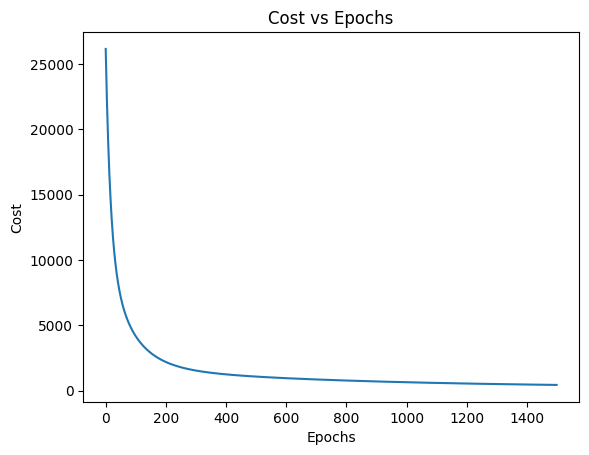

[[ 3.44960341e-09  4.81194425e-09 -5.08610123e-09 ... -4.40152818e-09
   1.33047913e-09 -7.24369238e-09]]
tss :  1.0924073981938032e-12
rss :  8.626244760226294e-14
Iteration no. 7: R2 = 0.9210345446718046
44


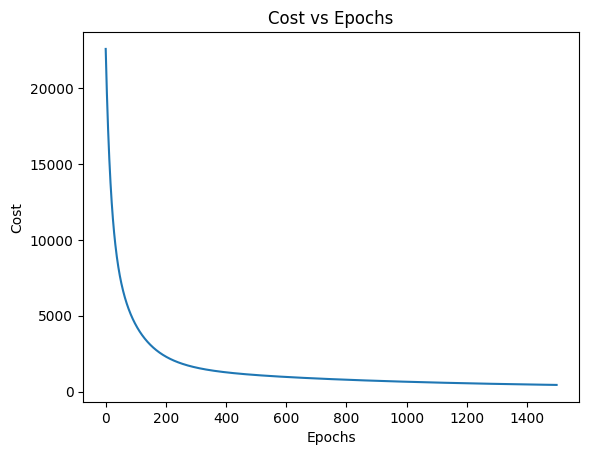

[[-4.03204415e-09  2.40489234e-10  9.52404916e-10 ... -1.17566473e-09
  -1.06360173e-08  4.20748353e-09]]
tss :  1.1398221637379104e-12
rss :  9.023336156962422e-14
Iteration no. 8: R2 = 0.9208355790576008
46


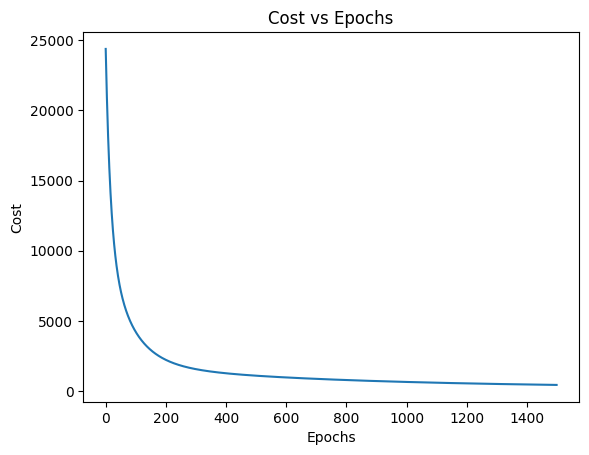

[[-2.03236418e-09  1.80294911e-09  1.32092128e-09 ...  2.27005526e-11
  -7.58309651e-09  4.33982592e-09]]
tss :  1.0659798431084186e-12
rss :  8.486872444421288e-14
Iteration no. 9: R2 = 0.9203843065205305
98


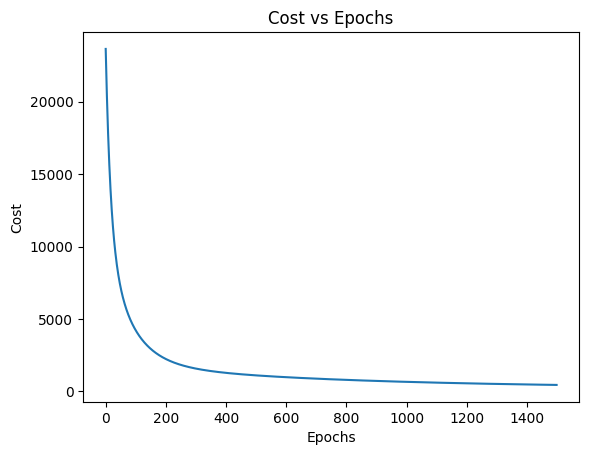

[[ 1.22909284e-09 -4.29792088e-11 -8.82852993e-09 ... -6.79748926e-11
   1.24415992e-08 -3.10395704e-09]]
tss :  1.1006096712194454e-12
rss :  8.827676326847744e-14
Iteration no. 10: R2 = 0.9197928515650156


In [ ]:
#finding avg R2 score with a given degree and different sets of datapoints
r2_scores=[]
for i in range(1,11,1):
        x=random.randint(1, 100)
        X_train_split, X_val, y_train_split, y_val = train_test_split(X_train.values, y_train.values, test_size=0.2, random_state=x)
        print(x)
        X_train_poly = polynomial_features(X_train_split,7)
        X_val_poly = polynomial_features(X_val,7)
        X_train_poly=X_train_poly.T
        y_train_df=y_train_split.T
        X_test_poly=X_val_poly.T
        y_test_df=(y_val.T)
        y_test_df = np.array(y_test_df)
        y_test_df = y_test_df.reshape(-1,1)
        y_train_df = np.array(y_train_df)
        y_train_df = y_train_df.reshape(-1,1)
        y_train_df=y_train_df.T
        y_test_df=y_test_df.T
        scaling_factor = 1e10
        y_train_scaled = y_train_df * scaling_factor#####

        model = Custom_Linear_Regression(.00006,1500)
        parameters=model.fit(X_train_poly, y_train_scaled)
        y_pred=model.predict(X_test_poly,parameters[0],parameters[1])
        y_pred = y_pred / scaling_factor
        print(y_pred[:10])
        r2 = r2_score(y_test_df, y_pred)
        r2_scores.append(r2)
        print(f'Iteration no. {i}: R2 = {r2}')

46


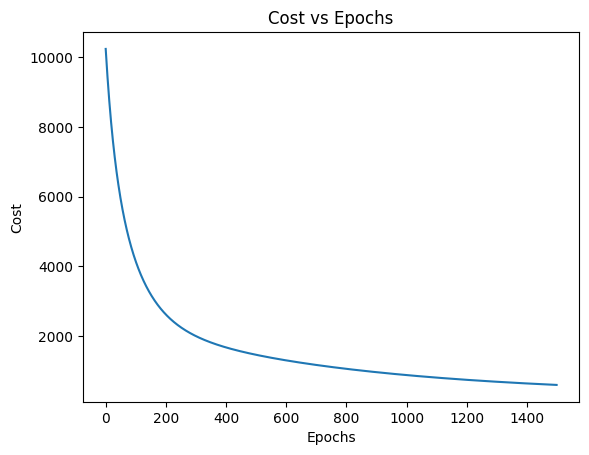

[[ 2.77818582e-09  2.83036594e-09  1.38995267e-09 ... -2.04769767e-10
  -6.33854649e-09  3.57425609e-09]]
tss :  1.0659798431084186e-12
rss :  1.1521108231014347e-13
Iteration no. 1: R2 = 0.8919200179487582
41


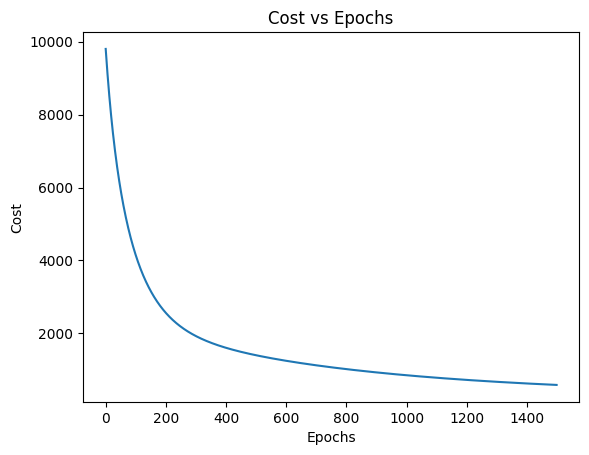

[[ 4.74544001e-09 -1.00563450e-08  7.36774517e-11 ...  8.55637277e-09
  -6.29925884e-10 -9.07490625e-10]]
tss :  1.0639617932788793e-12
rss :  1.1312059427621694e-13
Iteration no. 2: R2 = 0.8936798341906564
12


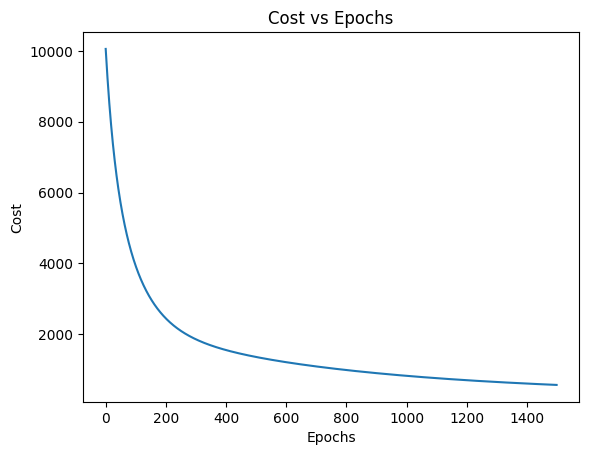

[[ 1.74290126e-08 -2.07910516e-09 -6.50492304e-09 ... -4.21991836e-09
  -1.42594723e-08 -9.18249720e-09]]
tss :  1.105088938674515e-12
rss :  1.1008237762816502e-13
Iteration no. 3: R2 = 0.9003859564821978
29


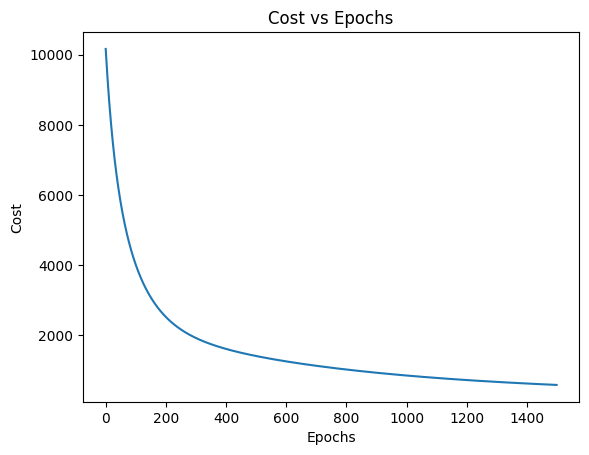

[[-1.56500929e-09 -2.90789587e-09  1.33323007e-08 ...  1.74955529e-09
  -4.11782010e-09  1.32863090e-08]]
tss :  1.1053532105532112e-12
rss :  1.0748415640890437e-13
Iteration no. 4: R2 = 0.90276035263415
13


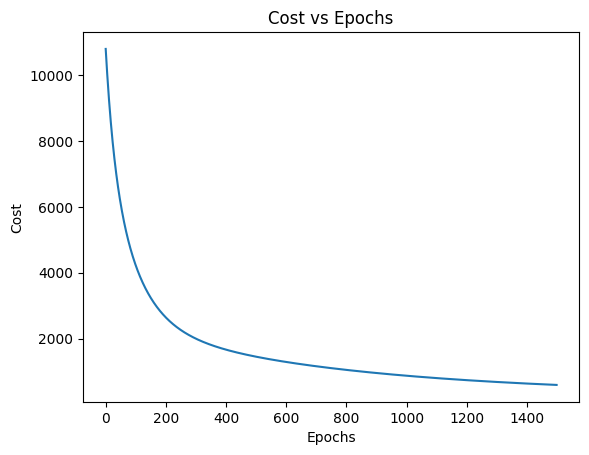

[[ 7.82761859e-09 -6.24113751e-09 -2.58879820e-09 ...  1.60615740e-08
  -2.65917974e-09  1.05231513e-08]]
tss :  1.1136423463585997e-12
rss :  1.1761882246267165e-13
Iteration no. 5: R2 = 0.8943836655931207
74


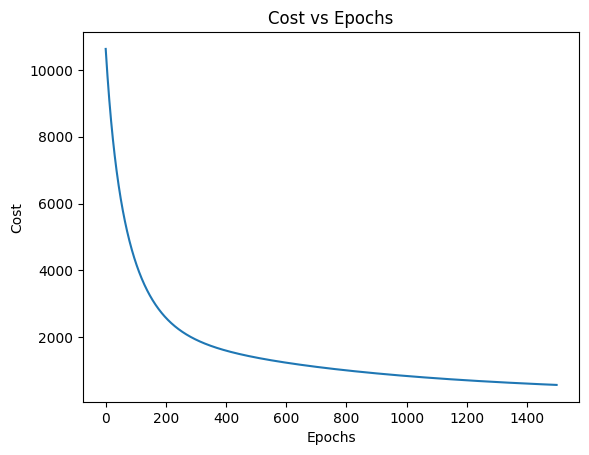

[[-1.79027761e-09  4.81490016e-10  1.63653112e-08 ...  2.82344805e-09
   1.80237886e-09  1.17069779e-08]]
tss :  1.153954504576202e-12
rss :  1.1497907782141202e-13
Iteration no. 6: R2 = 0.9003608224020592
12


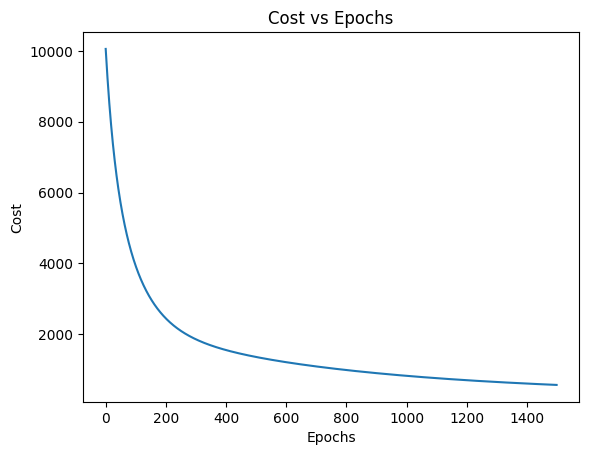

[[ 1.74290126e-08 -2.07910516e-09 -6.50492304e-09 ... -4.21991836e-09
  -1.42594723e-08 -9.18249720e-09]]
tss :  1.105088938674515e-12
rss :  1.1008237762816502e-13
Iteration no. 7: R2 = 0.9003859564821978
88


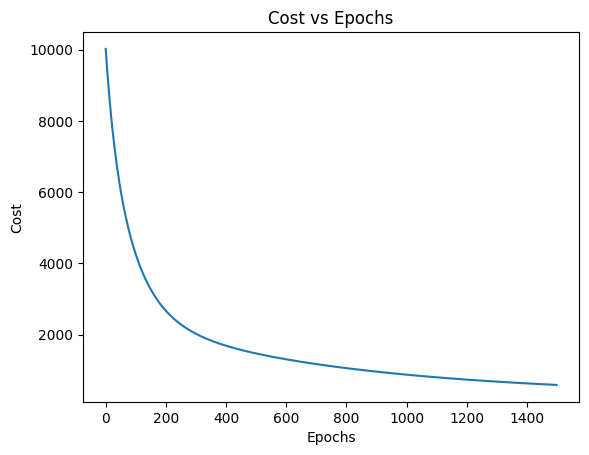

[[ 9.88473920e-10  4.22862819e-10 -1.98635650e-08 ...  1.48181306e-08
  -6.15292318e-09  2.05611379e-09]]
tss :  1.10369863667647e-12
rss :  1.1406174593172327e-13
Iteration no. 8: R2 = 0.8966549906456408
44


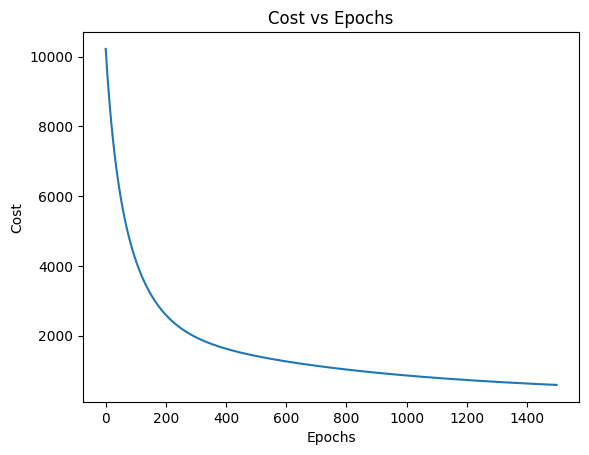

[[-3.97379337e-09  1.19454103e-10  1.15696404e-09 ... -9.29541145e-10
  -8.90108489e-09  2.58797335e-10]]
tss :  1.1398221637379104e-12
rss :  1.1920190549424407e-13
Iteration no. 9: R2 = 0.8954206109632614
25


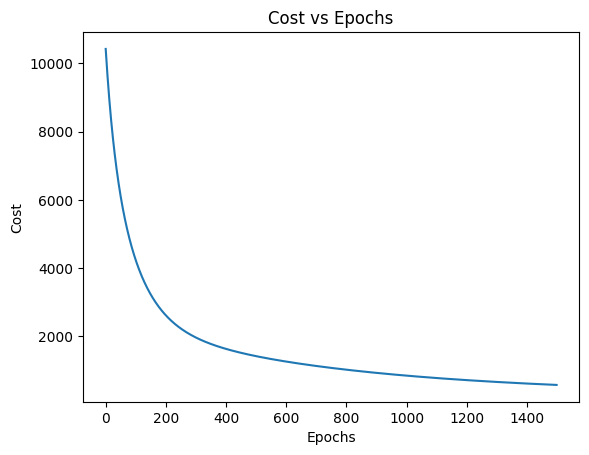

[[-2.37825199e-08 -1.51455504e-08 -2.76023515e-10 ... -5.63370755e-10
   1.17757144e-10 -8.43411940e-10]]
tss :  1.0822250624545034e-12
rss :  1.1245541280913915e-13
Iteration no. 10: R2 = 0.8960887002985418


In [ ]:
r2_scores=[]
for i in range(1,11,1):
        x=random.randint(1, 100)
        X_train_split, X_val, y_train_split, y_val = train_test_split(X_train.values, y_train.values, test_size=0.2, random_state=x)
        print(x)
        X_train_poly = polynomial_features(X_train_split,6)
        X_val_poly = polynomial_features(X_val,6)
        X_train_poly=X_train_poly.T
        y_train_df=y_train_split.T
        X_test_poly=X_val_poly.T
        y_test_df=(y_val.T)
        y_test_df = np.array(y_test_df)
        y_test_df = y_test_df.reshape(-1,1)
        y_train_df = np.array(y_train_df)
        y_train_df = y_train_df.reshape(-1,1)
        y_train_df=y_train_df.T
        y_test_df=y_test_df.T
        scaling_factor = 1e10
        y_train_scaled = y_train_df * scaling_factor#####

        model = Custom_Linear_Regression(.00006,1500)
        parameters=model.fit(X_train_poly, y_train_scaled)
        y_pred=model.predict(X_test_poly,parameters[0],parameters[1])
        y_pred = y_pred / scaling_factor
        print(y_pred[:10])
        r2 = r2_score(y_test_df, y_pred)
        r2_scores.append(r2)
        print(f'Iteration no. {i}: R2 = {r2}')

96


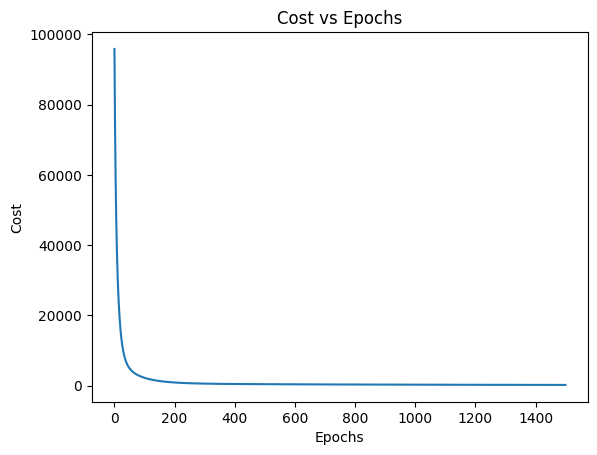

[[-1.44704219e-08 -1.60365005e-09  1.22226216e-09 ... -1.45365971e-08
   3.95370453e-09 -2.71232087e-08]]
tss :  1.1376802592684703e-12
rss :  3.4439281793718616e-14
Iteration no. 1: R2 = 0.9697285054274712
90


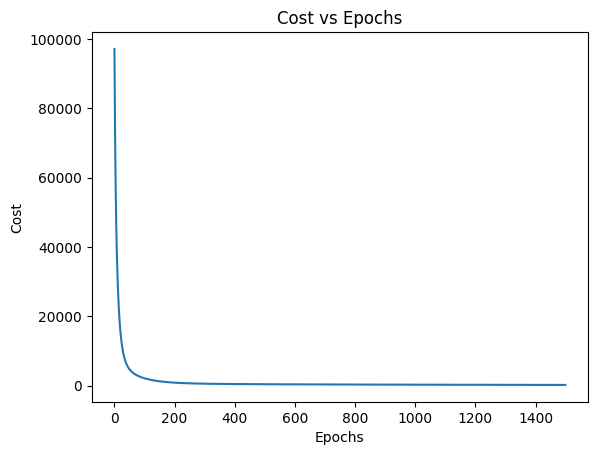

[[ 6.28897983e-09  5.58476500e-09 -5.09968625e-09 ... -3.53341788e-09
   2.99129403e-09 -5.74772727e-09]]
tss :  1.0924073981938032e-12
rss :  3.2395380913171467e-14
Iteration no. 2: R2 = 0.9703449638232639
22


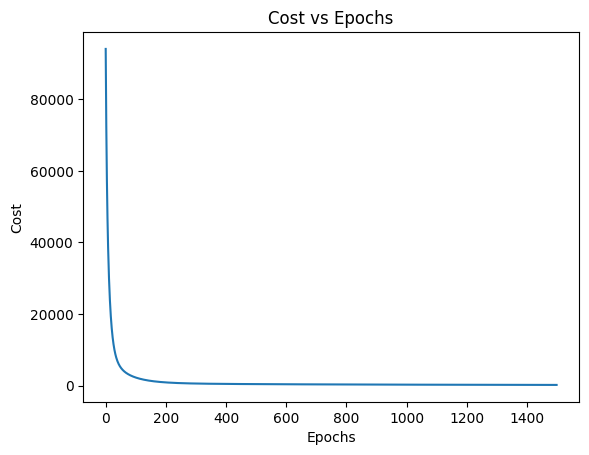

[[ 8.57826678e-10 -1.31636532e-08 -1.42136434e-09 ...  6.11267720e-09
   1.99737307e-10 -7.69668670e-09]]
tss :  1.1383485732620423e-12
rss :  3.603852882459148e-14
Iteration no. 3: R2 = 0.9683413941291112
98


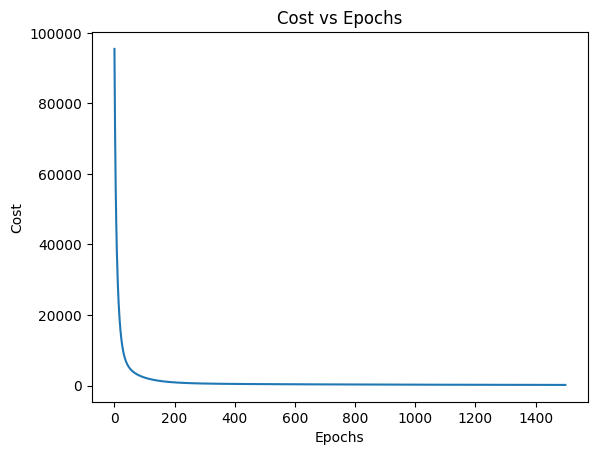

[[ 1.87953868e-09  2.43933742e-11 -5.88551640e-09 ...  1.18586287e-10
   1.69255630e-08 -3.80111763e-09]]
tss :  1.1006096712194454e-12
rss :  3.767464842198281e-14
Iteration no. 4: R2 = 0.9657692918687146
63


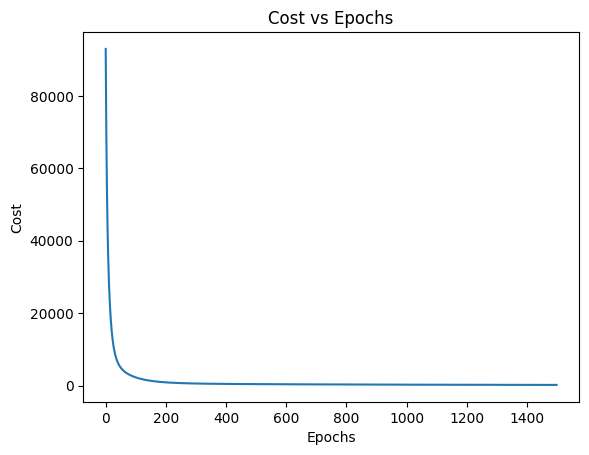

[[-1.39795639e-09 -1.02057789e-09  2.96175065e-09 ... -4.49149608e-09
  -5.83509506e-09 -6.96893756e-10]]
tss :  1.09390230338656e-12
rss :  3.466743767966034e-14
Iteration no. 5: R2 = 0.9683084699864558
63


KeyboardInterrupt: 

In [ ]:
r2_scores=[]
for i in range(1,11,1):
        x=random.randint(1, 100)
        X_train_split, X_val, y_train_split, y_val = train_test_split(X_train.values, y_train.values, test_size=0.2, random_state=x)
        print(x)
        X_train_poly = polynomial_features(X_train_split,8)
        X_val_poly = polynomial_features(X_val,8)
        X_train_poly=X_train_poly.T
        y_train_df=y_train_split.T
        X_test_poly=X_val_poly.T
        y_test_df=(y_val.T)
        y_test_df = np.array(y_test_df)
        y_test_df = y_test_df.reshape(-1,1)
        y_train_df = np.array(y_train_df)
        y_train_df = y_train_df.reshape(-1,1)
        y_train_df=y_train_df.T
        y_test_df=y_test_df.T
        scaling_factor = 1e10
        y_train_scaled = y_train_df * scaling_factor#####

        model = Custom_Linear_Regression(.00006,1500)
        parameters=model.fit(X_train_poly, y_train_scaled)
        y_pred=model.predict(X_test_poly,parameters[0],parameters[1])
        y_pred = y_pred / scaling_factor
        print(y_pred[:10])
        r2 = r2_score(y_test_df, y_pred)
        r2_scores.append(r2)
        print(f'Iteration no. {i}: R2 = {r2}')

**Cross-Validation**

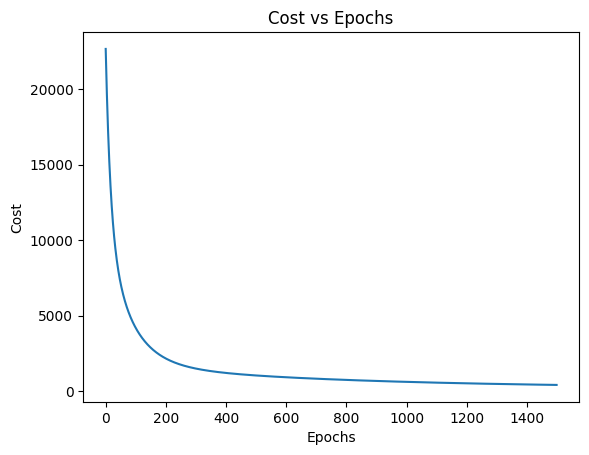

tss :  9.32199526056615e-13
rss :  7.1630985329614e-14
0.9231591699765961


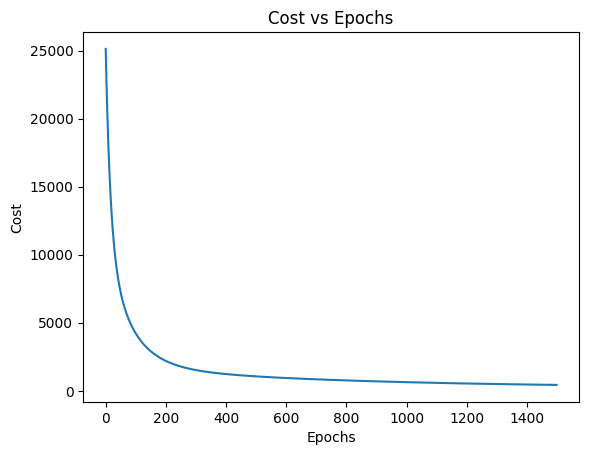

tss :  8.969851082890725e-13
rss :  6.756208207877138e-14
0.9246787026290317


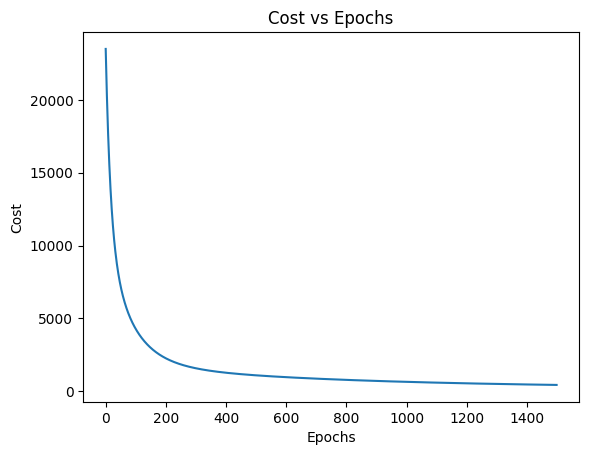

tss :  9.171316734825258e-13
rss :  7.142213459895391e-14
0.9221244487961578


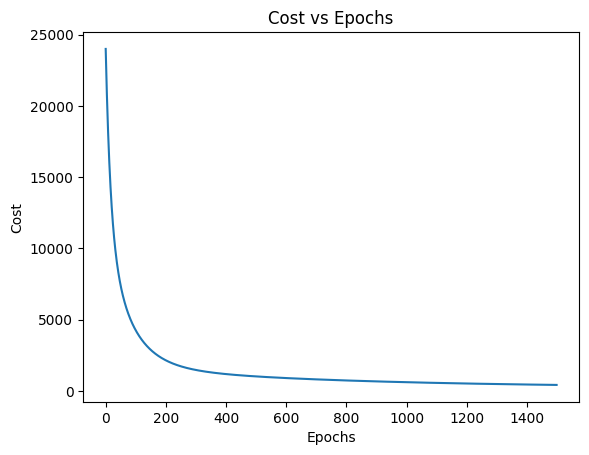

tss :  9.474122921630797e-13
rss :  6.711525561859887e-14
0.9291593995837176


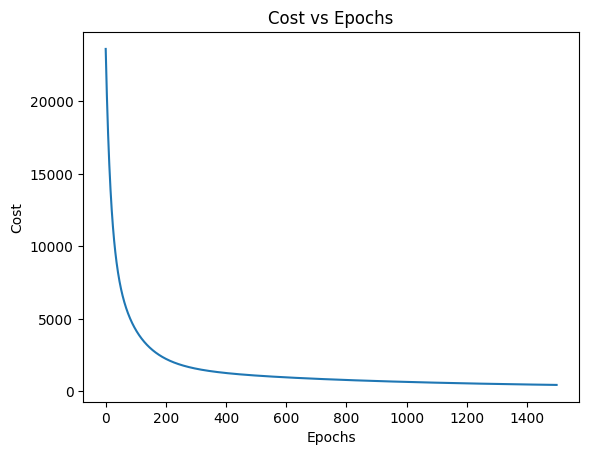

tss :  8.940237052194869e-13
rss :  7.499940693886985e-14
0.916110270341817


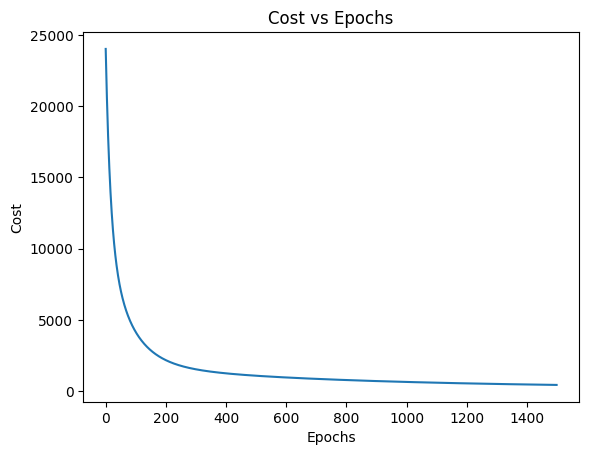

tss :  8.88496583684587e-13
rss :  7.45672735334849e-14
0.9160747774355472
Cross-Validated R² Scores: [0.9231591699765961, 0.9246787026290317, 0.9221244487961578, 0.9291593995837176, 0.916110270341817, 0.9160747774355472]
Average Cross-Validated R²: 0.9219


In [ ]:
#K_fold_cross_validation function
def k_fold_cross_validation(X, y, k, model_class, learning_rate, num_iterations, degree, scaling_factor):
    # Shuffle the data
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Splitting the data into k folds
    fold_size = X.shape[0] // k
    r2_scores = []

    for i in range(k):
        val_start = i * fold_size
        val_end = val_start + fold_size
        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]

        X_train = np.concatenate((X[:val_start], X[val_end:]), axis=0)
        y_train = np.concatenate((y[:val_start], y[val_end:]), axis=0)

        X_train_poly = polynomial_features(X_train, degree)
        X_val_poly = polynomial_features(X_val, degree)

        y_train_scaled = y_train * scaling_factor

        X_train_poly = X_train_poly.T
        X_val_poly = X_val_poly.T
        y_train_scaled = y_train_scaled.reshape(-1, 1).T
        y_val = y_val.reshape(-1, 1).T

        model = model_class(learning_rate,num_iterations)
        parameters = model.fit(X_train_poly, y_train_scaled)

        # Predict
        y_pred = model.predict(X_val_poly, parameters[0], parameters[1])
        y_pred = y_pred / scaling_factor

        # Calculate R²
        r2 = r2_score(y_val.flatten(), y_pred.flatten())
        print(r2)
        r2_scores.append(r2)
        del X_train_poly, X_val_poly, y_train_scaled, y_val, y_pred
    # Print average R² score across folds
    average_r2 = np.mean(r2_scores)
    print(f'Cross-Validated R² Scores: {r2_scores}')
    print(f'Average Cross-Validated R²: {average_r2:.4f}')

k = 6
learning_rate = 0.00006
num_iterations = 1500
degree = 7
scaling_factor = 1e10

k_fold_cross_validation(X_train.values, y_train.values, k, Custom_Linear_Regression, learning_rate, num_iterations, degree, scaling_factor)


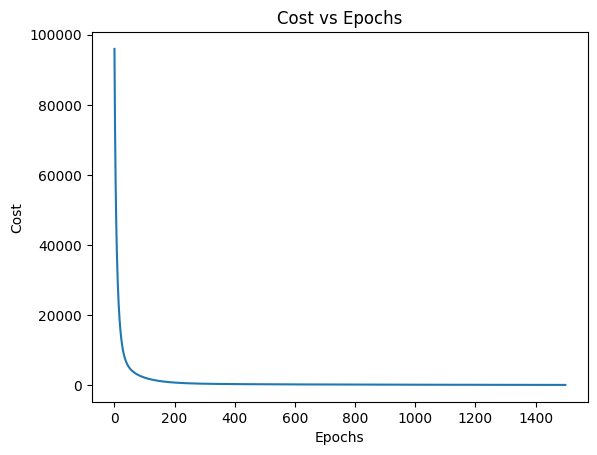

tss :  9.32199526056615e-13
rss :  2.9377780457999634e-14
0.9684855230700735


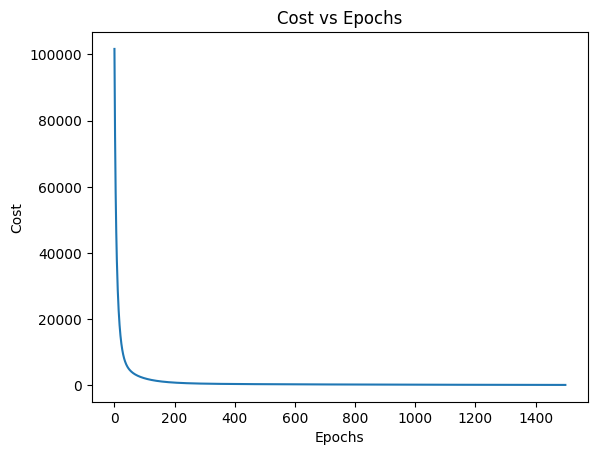

tss :  8.969851082890725e-13
rss :  2.60837058388927e-14
0.9709206924419902


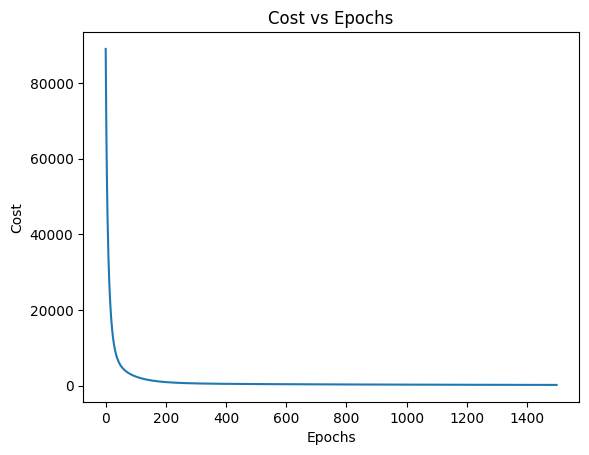

tss :  9.171316734825258e-13
rss :  3.003963862831954e-14
0.9672461005361932


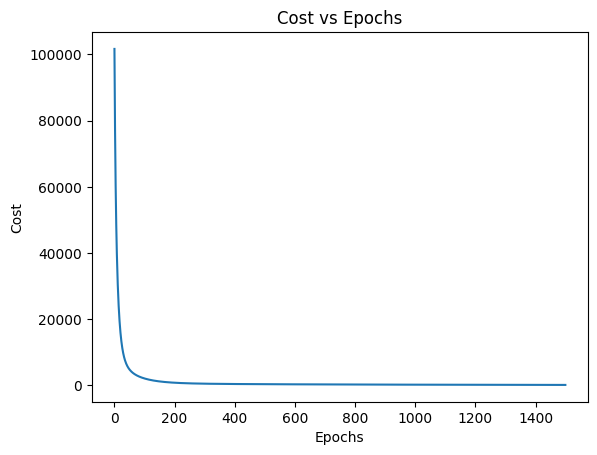

tss :  9.474122921630797e-13
rss :  2.9518653961702797e-14
0.9688428636551596


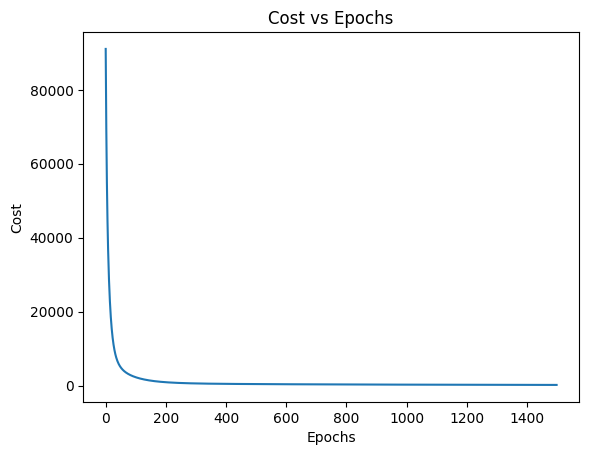

tss :  8.940237052194869e-13
rss :  2.901094929331062e-14
0.9675501341587041


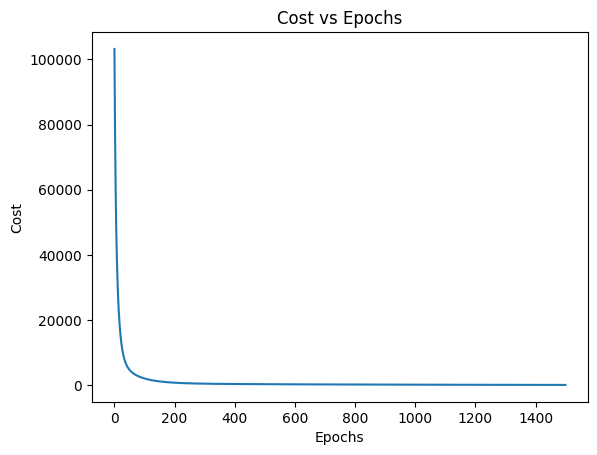

tss :  8.88496583684587e-13
rss :  2.729027530079182e-14
0.9692848843744347
Cross-Validated R² Scores: [0.9684855230700735, 0.9709206924419902, 0.9672461005361932, 0.9688428636551596, 0.9675501341587041, 0.9692848843744347]
Average Cross-Validated R²: 0.9687


In [ ]:
k = 6
learning_rate = 0.00006
num_iterations = 1500
degree = 8
scaling_factor = 1e10

k_fold_cross_validation(X_train.values, y_train.values, k, Custom_Linear_Regression, learning_rate, num_iterations, degree, scaling_factor)

In [ ]:
degree=8
X_train_poly = polynomial_features(X_train_split,degree)
X_val_poly = polynomial_features(X_val,degree)
X_train_poly=X_train_poly.T
y_train_df=y_train_split.T
X_test_poly=X_val_poly.T
y_test_df=(y_val.T)
y_test_df = np.array(y_test_df)
y_test_df = y_test_df.reshape(-1,1)
y_train_df = np.array(y_train_df)
y_train_df = y_train_df.reshape(-1,1)
y_train_df=y_train_df.T
y_test_df=y_test_df.T
print(y_train_df)

[[-6.78000490e-10  6.43798499e-11 -2.68857637e-09 ...  2.28107591e-09
  -1.25203318e-08  7.49449032e-10]]


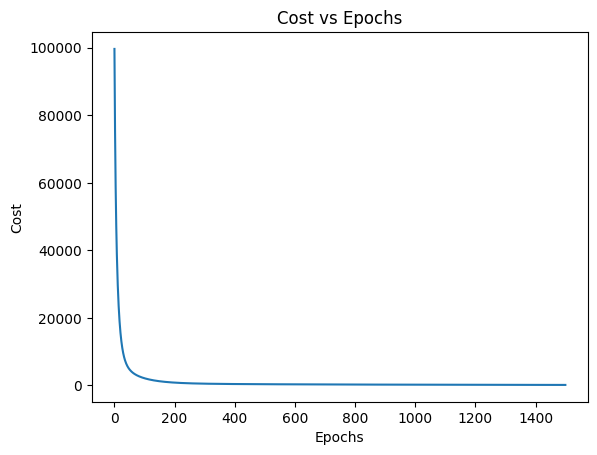

tss :  1.1236703464548135e-12
rss :  3.6031733983899635e-14
Degree 8: R2 = 0.9679338926246652


In [ ]:
scaling_factor = 1e10
y_train_scaled=y_train_df*scaling_factor
model = Custom_Linear_Regression(.00006,1500)
parameters=model.fit(X_train_poly, y_train_scaled)
y_pred=model.predict(X_test_poly,parameters[0],parameters[1])
y_pred = y_pred / scaling_factor
r2 = r2_score(y_test_df, y_pred)
print(f'Degree {degree}: R2 = {r2}')

(9600,)
(9600,)
(9600,)


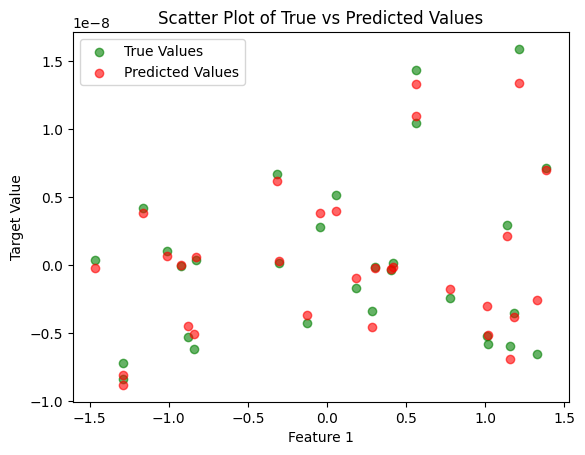

In [ ]:

feature_index = 0
X_feature = X_test_poly.T.values[:,3]
y_val = y_val.flatten()
y_pred = y_pred.flatten()
print(X_feature.shape)
print(y_val.shape)
print(y_pred.shape)
plt.scatter(X_feature[:30], y_val[:30], color='green', label='True Values', alpha=0.6)
plt.scatter(X_feature[:30], y_pred[:30], color='red', label='Predicted Values', alpha=0.6)

plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Target Value')
plt.title('Scatter Plot of True vs Predicted Values')
plt.legend()
plt.show()


**Test Dataset**

In [ ]:
print(X_test.shape)
X_testd_poly = polynomial_features(X_test.values,8)
X_testdata_poly=X_testd_poly.T
print(X_testdata_poly.shape)

(12000, 5)


In [ ]:
y_pred_testdata=model.predict(X_testdata_poly,parameters[0],parameters[1])
y_pred_testdata = y_pred_testdata / scaling_factor
print(y_pred_testdata)

[[ 1.11996624e-08 -8.55580188e-09 -1.26465768e-09 ... -1.20662560e-09
  -1.15716588e-09 -1.59544825e-09]]
